# WP10 Computergestützte Biologie I: Mathematische Modelle dynamischer Systeme (SoSe24)
## Woche 02

Teil der heutigen Übung ist:

    - Numerische Lösung des Quad-LIF Neurons
    - Biophysikalische Grundlagen des LIF-Neurons
    - Fixpunkte, Stabilitätsanalyse, Bifurkation
    - Berechnung von Feuerrate und Membranströmen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Modellparameter
Modellparameter des Quadratic-Leaky-Integrate-And-Fire-Neurons.

In [2]:
def set_parameters():
    global a_0, g_l, eps_0, eps_r, d, c_m, tau_m
    global v_rest, v_crit, v_reset, radius, surface, c_abs
    global h, v_peak
    
    # [S/m^2] leak conductance (or 0.3 mS/cm^2)
    g_l = 0.3

    # [As/Vm] vacuum permittivity
    eps_0 = 8.854e-12 

    # relative permittivity
    eps_r = 4.518 

    # [nm] diameter of cell membrane
    d = 6.5e-9 

    # specific membrane capacitance (cap. per surface area) 
    #must be multiplied by surface area to get
    # absolute capacitance [F/m^2]
    c_m = eps_r * eps_0 / d 

    # membrane time constant [s] ususally between 10 and 100 ms
    tau_m = c_m / g_l
    
    # [V] resting potential of cell membrane
    v_rest = -0.065

    # [V] critical voltage for spike initiation
    v_crit = -0.055
    
    # reset voltage after spike
    v_reset = -0.070
    
    # maximum voltage of spike. If voltage reaches this value it 
    # is reset to v_reset
    v_peak = 0.0

    # [m] cell radius
    radius = 10.e-6 

    # [m^2] surface area of cell membrane 
    surface = 4. * np.pi * np.square(radius)  

    # [F] absolute capacitance of membrane
    c_abs = c_m * surface
    
    # time step
    h = 0.0001
    
    # model parameter of integrate and fire neuron
    a_0 = 40.

set_parameters()
print(tau_m)

0.02051403692307692


# Quadratic-Integrate-and-Fire-Neuron
Das Quadratic-Integrate-And-Fire-Neuron wird durch folgende Gleichung beschrieben:

$$
c_m \dfrac{dV}{dt} = g_l \cdot a_0(V-V_{rest})(V-V_{crit}) + i(t),~~~~~~~a_0>0,~~ V_c > V_r  ~~~~~~~~~~~~~~~~~~~~~(Gleichung~1)
$$

## Aufgabe 1
Nennen Sie die abhängige und unabhängige Variable. Charakterisieren Sie die Gleichung nach Art der DGL, Ordnung, Linearität und Homogenität. Unter welcher Bedingung ist das System autonom? 

Bringen Sie die Gleichung in ein Form (dynamische Form), sodass die Gleichung numerisch gelöst werden kann ($f(V(t), t)?)$.

Wieviele Randbedingungen werden benötigt? Nennen Sie ein mögliches Beispiel.

## Lösung 1

Gewöhnliche DGL, 1. Ordung, nicht-linear, inhomogen. $V$ ist die abhängige und $t$ die Unabhängige Variable.

Die allgemeine Form lautet: 
$$\dfrac{dV}{dt} = f(V(t), t) $$

mit 

$$f(V(t), t)=\dfrac{g_l a_0}{c_m}(V-V_r)(V-V_{c}) + \dfrac{1}{c_m}i(t)$$

Immer wenn $V(t)$ größer als $0~ mV$ wird, setzen wir zurück zu $V(t)=V_{reset}$. 

Wir benötigen eine Randbedingung z.B. $v(t=0) = v_0$ (Anfangsbedingung).

## Aufgabe 2
Lösen sie die DGL des Quad-LIF-Neurons numerisch.

- Definieren Sie eine Funktion `f_quad(v,t)`
- Nutzen sie die Parameter: \
`
current =  0. # pA
i_in = lambda t: current
t_min, t_max = 0.,.1
v_0 = -0.1
t = np.arange(t_min, t_max, h)
a_0 = 40. 
`
- Übergeben sie `f_quad`, `v_0` und `t` and `odeint` aus dem scipy-modul zum Lösen der DGL.
- Was passiert wenn sie `v_0` z.B. auf -0.05 setzen? Wie könnten Sie Ihr Lösungsverfahren anpassen

In [3]:
def f_quad(v,t):
    """
    params:
    v: membrane potential at time t_n
    t: time point t_n
    
    
    further global variables used in this function:
    tau_m: membrane time constant
    a_0: model parameter
    g_l: membrane conductance
    v_rest: resting potential
    v_crit: crtitcal potential of qLIF-Neuron
    
    returns: dV/dt at time t_n, where dV/dt=f(V_n,t_n)
    """
    dvdt = """TODO"""
    return  dvdt

ValueError: Unrecognized character T in format string

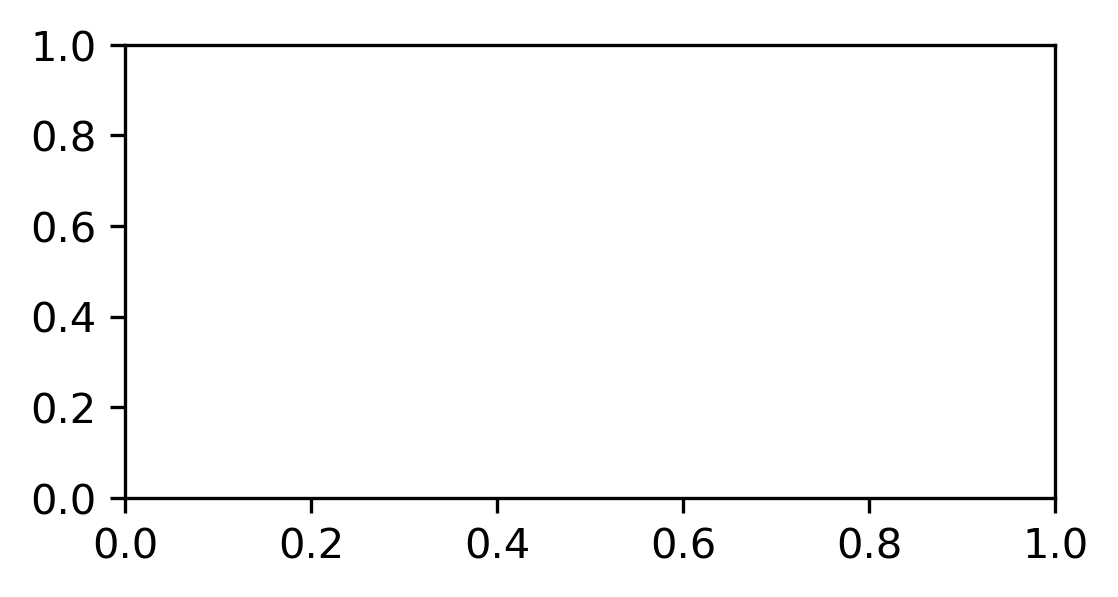

In [4]:
##########################
# set simulation parameters
current =  0. # pA
i_in = lambda t: current
t_min, t_max = 0.,.1
v_0 = -.1
t = np.arange(t_min, t_max, h)
a_0 = 40. # TODO diesen Verändern
##########################
# run
v = """TODO"""

##########################
# plot results
fig = plt.figure(dpi=300, figsize=(4,2))
ax = fig.add_subplot(111)
ax.plot(t,v, label='const. current {i:.1f} pA'.format(i=current*1.e12), lw=1.)
ax.legend(fontsize=6)
ax.set_xlabel('time [s]', fontsize=6)
ax.set_ylabel('membrane voltage [V]', fontsize=6)
ax.tick_params(labelsize=6)

##########################
# reset parameters
set_parameters()

## Lösung 2

- Numerische Lösung für $V_0=-0.1V$ siehe unten.
- Numerische Lösung für $V_0=-0.005V$: Wir benötigen eine weiter Funktion `solve`, welche die Spannung zurücksetzt, sobald diese einen festgesetzten Wert (z.B. $V=0mV$) überschreitet. Anderenfalls konvergiert die Spannung gegen unendlich.

In [14]:
##############
# LÖSUNG
##############
def f_quad(v,t):
    """
    params:
    v: membrane potential at time t_n
    t: time point t_n
    
    
    further global variables used in this function:
    tau_m: membrane time constant
    a_0: model parameter
    g_l: membrane conductance
    v_rest: resting potential
    v_crit: crtitcal potential of qLIF-Neuron
    
    returns: dV/dt at time t_n, where dV/dt=f(V_n,t_n)
    """
    dvdt = g_l * a_0 / c_m * (v - v_rest) * (v - v_crit) + i_in(t) / c_m
    return  dvdt

def solve(f_quad, v_0, t):
    v = np.zeros(np.shape(t))
    v[0] = v_0
    for i, t_i in enumerate(t[:-1]):
        j = i+1
        t_j=t[j]
        v_j = odeint(f_quad,v[i],[t_i,t_j])[1]
        if v_j>v_peak:
            v_j=v_reset
        v[j] = v_j
    return v

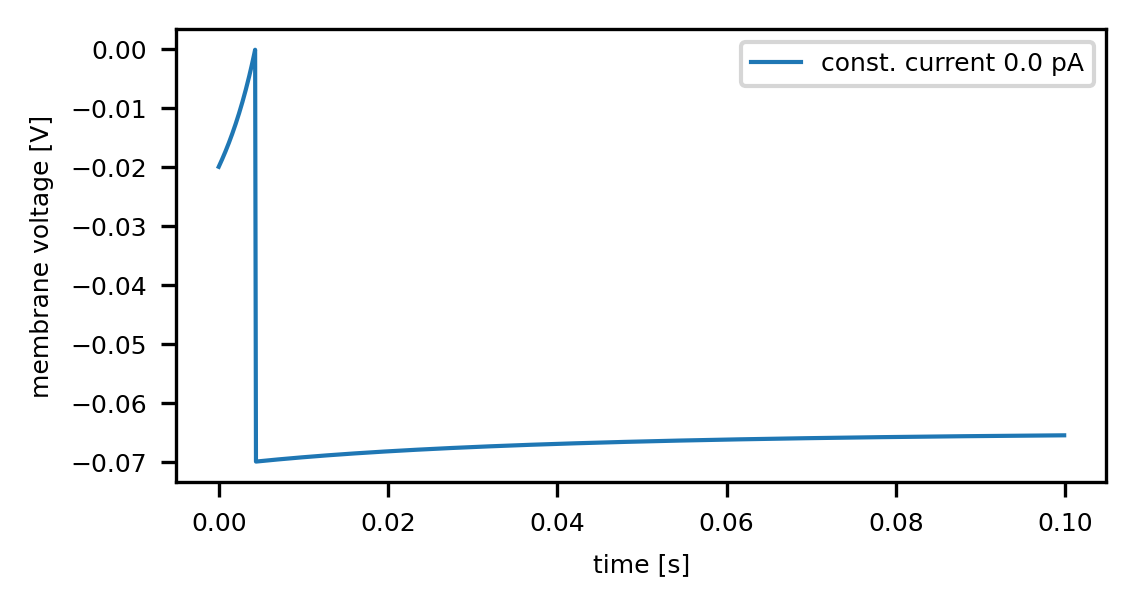

In [11]:
##########################
# set simulation parameters
current =  0. # pA
i_in = lambda t: current
t_min, t_max = 0.,.1
v_0 = -.02
t = np.arange(t_min, t_max, h)
a_0 = 40. # TODO diesen Verändern
##########################
# run
#v = odeint(f_quad, v_0, t) -> no reset of voltage
v = solve(f_quad, v_0, t)

##########################
# plot results
fig = plt.figure(dpi=300, figsize=(4,2))
ax = fig.add_subplot(111)
ax.plot(t,v, label='const. current {i:.1f} pA'.format(i=current*1.e12), lw=1.)
ax.legend(fontsize=6)
ax.set_xlabel('time [s]', fontsize=6)
ax.set_ylabel('membrane voltage [V]', fontsize=6)
ax.tick_params(labelsize=6)

##########################
# reset parameters
set_parameters()

## Aufgabe 3
Ändern Sie den Modellparamter $a_0$ in der Simulation oben. Testen Sie $a_0=1,4,10,40,100,400$. Welchen Wert würden Sie für $a_0$ wählen. Können Sie die Wahl begründen? Welche physikalische Einheit besitzt $a_0$

Beantworten Sie außerdem für das Quad-LIF Neuron Modell:

- Welche Bedeutung hat $g_l$?
- Welche Bedeutung hat $c_m$?
- Welche Bedeutung hat $V_{rest}$?
- Welche Bedeutung hat $V_{crit}$?
- Welches Vorzeichen hat $f(V(t), t)$ abhängig von $V$ für $i(t)=0$. Was bedeutet das für die zeitliche Änderung des Membranpotentials?
- Welche Bedeutung hat  $\tau=c_m/g_l$?

## Lösung 3
Wir wählen am besten $a_0=40$, da so das die Zeitkonstante in der Simulaiton (Zeit die das Membranpotential benötigt um zum Ruhepotential zurückzukehren) am besten $\tau$ wiederspiegelt. Außerdem gilt in diesem Fall näherungsweise $a_0(V-V_{crit})\sim1$.

Allerdings sehen wir in der Simulation, dass $\tau$ im Quad-LIF Neuron nicht immer der Membranzeitzeitkonstante wie im LI-Neuron entspricht. Die Membranspannung kehrt z.B. für $a_0=100$ im Quad-LIF Neuron schneller zum Ruhepotential zurück als $\tau$ erwarten lässt.



- $V_{rest}$: Ruhepotential [V]; Diesen Wert hat das Membranpotential im Ruhezustand.
- $V_{crit}$: Threshold (Schwellenwert) für Aktionspotential. Übersteigt das Membranpotential diesen Wert, kommt es zu einem Aktionspotential.
- $a_0$ hat die Einheit [1/V]. Erklärung: Die Linke Seite von Gleichung 1 hat Einheit [V] somit muss der Term $a_0(V-V_{rest})(V-V_{crit})$ ebenfalls die Einheit [V] haben.
- Es gilt 
          A) $f(V) > 0$ für $$V>V_{crit}$, 
    B) $f(V) < 0$ für $V_{rest} < V < V_{crit}$,
    C) $f(V) > 0$ für $$V<V_{rest}$,
    
 $f(V)$ bestimmt die zeitliche Ableitung von $V$. Für $f(V) < 0$ sinkt $V$ und für $f(V) > 0$ steigt $V$.

- $g_l$: Leitfähigkeit der Membran pro Fläche, Einheit [$S/m^2$]
 Die Bedeugung von $g_l$ werden wir noch einmal weiter unten untersuchen, auch hier ergeben sich Unterschiede.

## Aufgabe 4 - Fixpunkte 

Wir Analysieren die Fixpunkte des Quad-LIF Neurons. Gehen Sie folgendermaßen vor:

1) Visualisieren  Sie $f(V(t), t)$ für $i(t)=0$. 

2) Berechnen Sie die Lage der Fixpunkte und deren Stabilität für den Fall $i=0$.

3) Für den Fall, dass $i(t)=0$, lösen wir das Quad-LIF numerisch. Verändern Sie die Anfangsbedingung $V(t=0) = V_0$. Nutzen Sie Werte zwischen $-100~mV$ und 0 $0~mV$.  Wie verhält sich der zeitliche Verlauf der Membranspannung abhängig vom Wert der Anfangsbedingung? Passt das zu Ihren Ergebnissen aus 1) und 2)?

4) Visualisierten sie $$f(V(t), t)=\dfrac{g_l a_0}{c_m}(V-V_r)(V-V_{c}) + \dfrac{1}{c_m}i(t)
$$ nun für verschiedene konstante Elektrodenströme $i$. Wie verändert sich die Lage der Fixpunkte? Wie muss $i$ gewählt werden, sodass der Fixpunkt verschwindet?

5) Berechnen Sie den Bifurkationspunkt exakt. Wie ändert sich das Verhalten des Systems am Punkt der Bifurkation? Erklären Sie.

6) Wählen Sie nun einen konstanten Elektrodenstrom, sodass keine Fixpunkte mehr existieren? Wohin entwickelt sich das System in diesem Fall für $t\rightarrow\infty$? Erklären Sie damit warum bei einer numerischen Implementierung die Spannung bei einem bestimmten Wert zurückgesetzt werden muss!

7) Überprüfen Sie ihr Ergebnis in einer Computersimulation! Setzen Sie dazu die Stromstärke auf den berechneten Wert  für die Bifurkation und variieren die Spannung zwischen -0.062 und -0.058V. Erklären Sie das Verhalten.

8) Wie verändert Sie der zeitliche Verlauf der Spannung, wenn sie die Stromstärke weiter in kleinen Schritten erhöhen? Was geschieht wenn Sie die Stromstärke verringern?

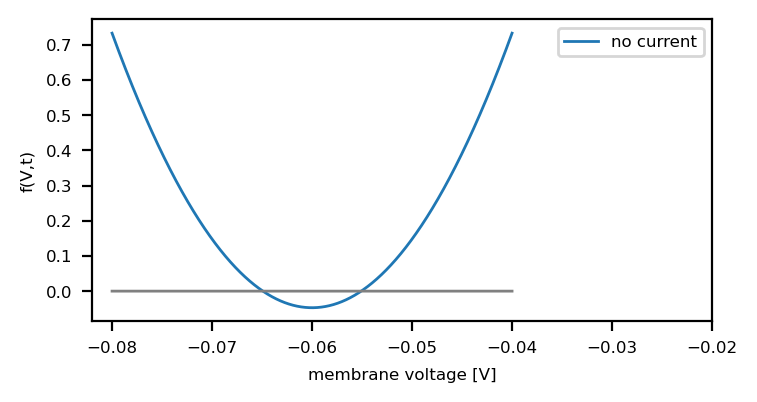

In [24]:
v = np.linspace(-0.080,-0.04,10000)
i_in = lambda t: 10.e-6
f_0 = f_quad(v,0) 

fig = plt.figure(dpi=200, figsize=(4,2))
ax = fig.add_subplot(111)
ax.plot(v,f_0, label='no current', lw=1.)
ax.plot(v,f_0*0., lw=1., color='grey')
ax.legend(fontsize=6)
ax.set_xlabel('membrane voltage [V]', fontsize=6)
ax.set_ylabel('f(V,t)', fontsize=6)
ax.set_xlim((-0.082, -0.02))
ax.tick_params(labelsize=6)
#ax.set_ylim(-2.,6)

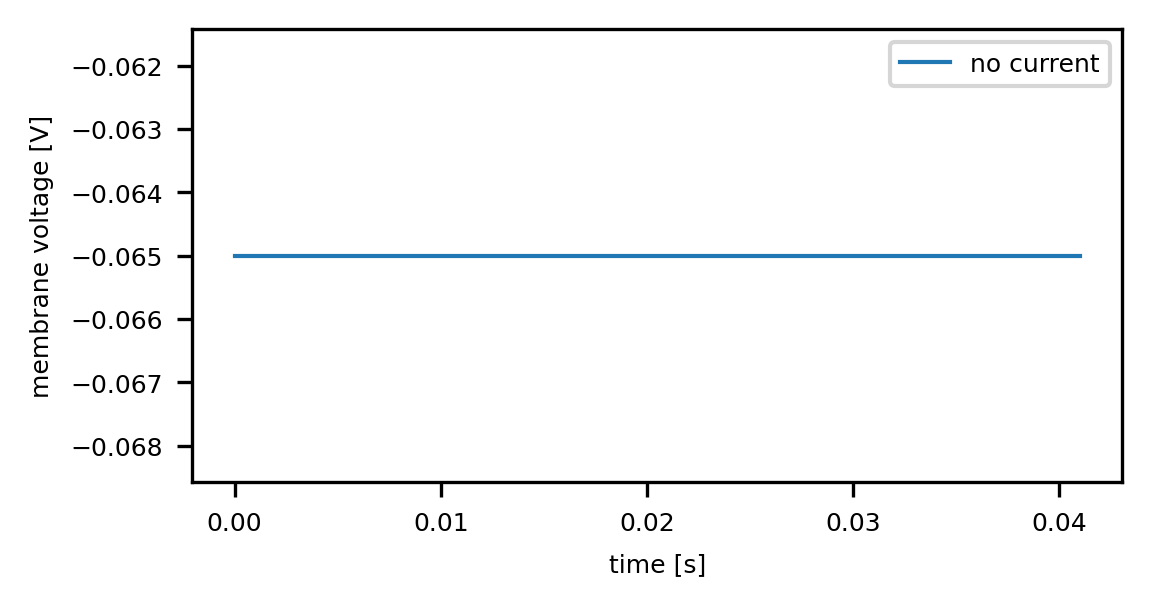

In [10]:
i_in = lambda t: 0.0
v_0 = -0.065
t = np.arange(t_min, 2*tau_m, h)
v=solve(f_quad, v_0, t)

##########################
fig = plt.figure(dpi=300, figsize=(4,2))
ax = fig.add_subplot(111)
ax.plot(t,v, label='no current', lw=1.)
ax.legend(fontsize=6)
ax.set_xlabel('time [s]', fontsize=6)
ax.set_ylabel('membrane voltage [V]', fontsize=6)
ax.tick_params(labelsize=6)


## Lösung 4

Wie verhält sich das System im Falle $i=0$ für verschiedene Anfangsbedingungen?

- $V_0 < V_{rest}$: $V(t)$ wächst streng monoton und konvergiert zu $V_{rest}$.
- $V_0 > V_{rest}$: $V(t)$ fällt streng monoton und konvergiert zu $V_{rest}$.
- $V_0 > V_{crit}$: $V(t)$ wächst streng monoton bis sie zurückgesetzt wird.
- $V_0 = V_{rest}$: $V(t)$ bleibt unverändert.
- $V_0 = V_{crit}$: $V(t)$ bleibt unverändert.

$ V_{rest}$ ist ein stabiler Fixpunkt und $V_{crit}$ ein instabiler. Lösungen konvergieren zu $ V_{rest}$ und entfernen sich von $V_{crit}$.

***Bifuktationspunkt:*** 
Am Bifurkationspunkte ändern sich die Fixpunkte. In diesem Fall fallen stabiler und instabller Fixpunkt zusammen. Wir nehmen an, dass $i(t) = i_{Bif}$ konstant und suchen $i_{Bif}$, sodass $f(V_{min})=0$ gilt.

Das Minimum von $f$ (der Extrempunkt von $f$ abhängig von $V$) liegt bei 
$$V_{min} = (V_{crit}+V_{rest})/2 = -60mV$$

Es gilt deshalb $i_{Bif}=f(V_{min},i=0)c_m=300 \mu A$

0.0003000000000000001


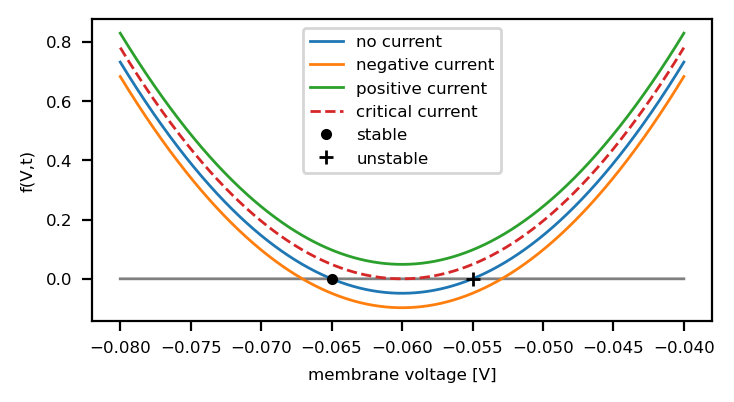

In [11]:
v = np.linspace(-0.080,-0.04,10000)

i_in = lambda t: 600.e-6
f_pos = f_quad(v,0)

i_in = lambda t: -300.e-6
f_neg = f_quad(v,0)

i_in = lambda t: 0.e-6
f_zero = f_quad(v,0)

# critical current
i_zero = lambda t: 0.e-6
v_extremum = (v_rest + v_crit) / 2. # minimum of f
f_extremum = f_quad(v_extremum, 0.)
i_bif = - f_extremum * c_m
print(i_bif)
i_in = lambda t: i_bif
f_crit = f_quad(v,0)

fig = plt.figure(dpi=200, figsize=(4,2))
ax = fig.add_subplot(111)
ax.plot(v,f_zero*0., lw=1., color='grey')
ax.plot(v,f_zero, label='no current', lw=1.)
ax.plot(v,f_neg, label='negative current', lw=1.)
ax.plot(v,f_pos, label='positive current', lw=1.)
ax.plot(v,f_crit, label='critical current', lw=1., ls='--')
ax.plot([v_rest],[0], 'ko', label='stable', ms=3)
ax.plot([v_crit],[0], 'k+', label='unstable', ms=5)
ax.legend(fontsize=6)
ax.set_xlabel('membrane voltage [V]', fontsize=6)
ax.set_ylabel('f(V,t)', fontsize=6)
ax.tick_params(labelsize=6)
#ax.set_ylim(-2.,10)

# Elektrodenstrom, kapazitiver Strom und Leak-Strom

***Kapazitive Strom*** pro Fläche $i_{cap}$ in $[A/m^2]$:
$$ i_{cap} = c_m \dfrac{dV}{dt} $$

Der gesamte kapazitive Strom in einer kugelförmigen Zelle ist

$$ I_{cap} = i_{cap} \cdot A$$

mit der Oberfläche $A$

$$ A = 4 \pi r^2$$

und dem Radius $r$.

***Leak Strom*** über gesamte Oberfläche: $g_l \cdot a_0 \cdot (V - V_{rest}) \cdot (V - V_{crit}) \cdot A$




### Python-Funktion zur Berechnung des gesamten kapazitiven Stroms und Leak-Stroms

In [20]:
def compute_capacitive_current(v,t):
    """
    v: array, membrane voltage at time t
    t: array, time points
    
    global variables
    tau_m
    g_l
    
    compute capacitive membrane current from voltage trace over time
    """

    i = np.zeros(np.shape(t))
    i[0] = (v[1] - v[0])/(t[1]-t[0]) # forward differenc
    i[-1] = (v[-1] - v[-2]) / (t[-1] - t[-2]) # backward difference
    for n in range(1,len(t)-1):
        i[n] = (v[n-1] - v[n+1])/(t[n-1]-t[n+1]) # central difference
    i = i*c_m*surface
    return i

def compute_leak_current(v,):
    """
    v: array, membrane voltage at time t
    t: array, time points
    
    global variables
    tau_m
    g_l
    
    compute leak membrane current from voltage trace over time
    """
    return g_l * a_0 * (v - v_rest) * (v - v_crit) * surface

### Beispiel

51.79815750582965 0.006154211076923076 0.02051403692307692 1.2566370614359174e-09


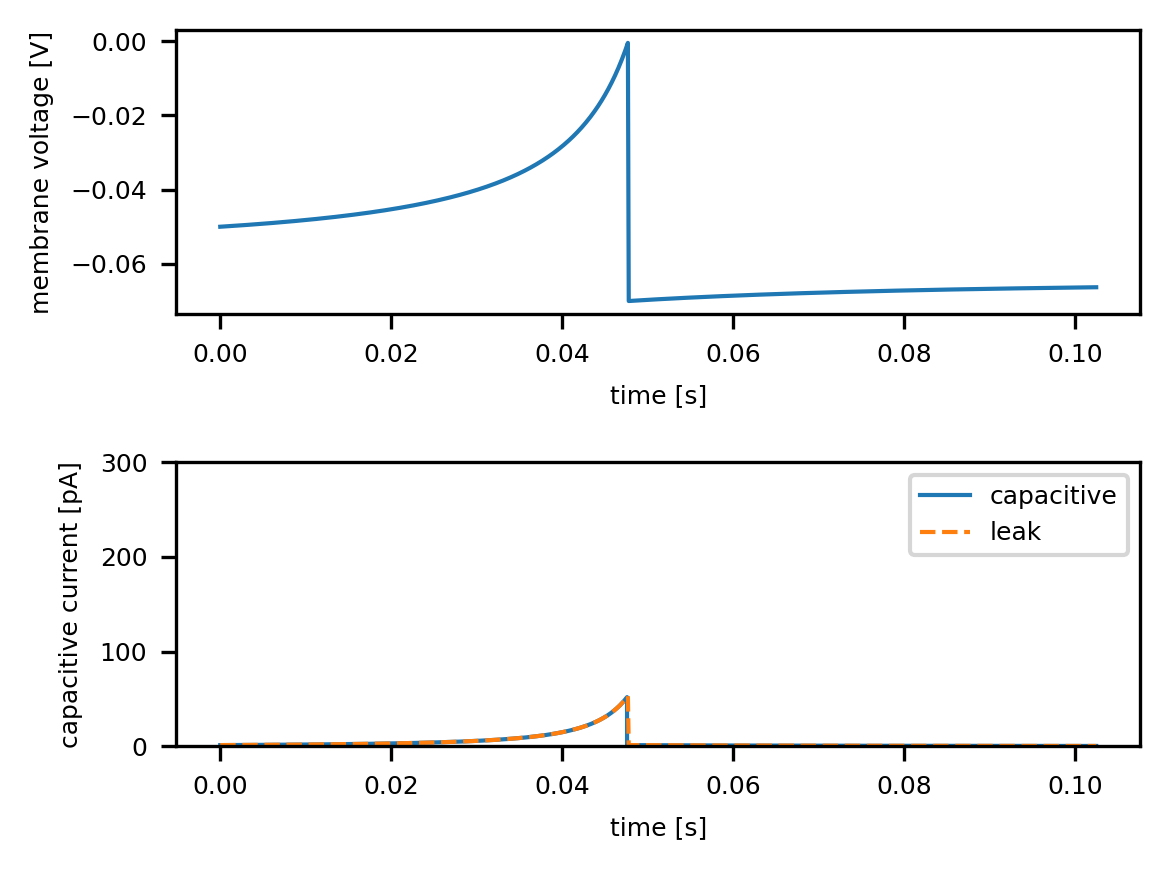

In [21]:
i_in = lambda t: 0.0
v_0 = -0.05
t = np.arange(t_min, 5*tau_m, h)
v=solve(f_quad, v_0, t)
i_cap = compute_capacitive_current(v,t)
i_leak = compute_leak_current(v)

##########################
fig = plt.figure(dpi=300, figsize=(4,3))
ax1 = fig.add_subplot(211)
ax1.plot(t,v, lw=1.)
ax1.set_xlabel('time [s]', fontsize=6)
ax1.set_ylabel('membrane voltage [V]', fontsize=6)
ax1.tick_params(labelsize=6)
ax2= fig.add_subplot(212)
ax2.plot(t,i_cap*1.e12, lw=1., label='capacitive')
ax2.plot(t,i_leak*1.e12, ls='--', lw=1., label='leak')
ax2.legend(fontsize=6)
ax2.set_xlabel('time [s]', fontsize=6)
ax2.set_ylabel('capacitive current [pA]', fontsize=6)
ax2.tick_params(labelsize=6)
ax2.set_ylim(0,300)
fig.tight_layout()

print(np.max(i_cap*1.e12), c_m, tau_m, surface)

## Aufgabe 5
1) Welche drei Arten von Strömen existieren im Quad-LIF Neuron?

2) Was gilt für den Fall, dass sie die drei Ströme summieren?

3) Das LI-Neuron besitzt einen ohmschen Membranwiderstand. Gilt das auch für das auch für das Quad-LIF Neuron?

Wie Bewerten Sie die Bedeutung der Konstanten $g_l$? Vergleichen Sie die beiden Modelle des Leaky-Integrator und des Quad-Leaky-Integrator-And-Fire Neurons.

8) Wie beurteilen Sie die Größe der Stromstärke (Vergleich mit Leaky-Integrator).

Vergleichen Sie außerdem den positven Teil des kapazitiven Membran-Strom mit dem Elektrodenstrom! Sind injizierter Strom und kapazitiver Strom gleich. Wie erklären Sie sich den Unterschied?

## Lösung 5

1) kapazitiver Strom $i_{cap} = c_m\frac{dV}{dt}$, Elektroden Strom $i_{el}=i(t)$ und Leak-Strom 
$i_{leak}=a_0 g_l (V-V_r)(V-V_c)$

2) Die Ströme gleichen sich aus $i_{cap} + i_{el} + i_{leak}=0$

3) Bei einem Ohmschen Widerstand gilt. I = U/R. Beim Quad-LIF Neuron gibt es keinen linearen Zusammenhang zwischen U und I. Der Term $g_l a_0(V-V_{crit})$ hat die Einheit einer Leitfähigkeit, ist aber kein Ohmscher Widerstand, da der Wert von der Spannung $V$ abhängt.

## Aufgabe 6 - Feuerrate
Messen Sie die Feuerrate (Aktionspotentiale pro Zeit) abhängig von der Stromstärke bei einem konstanten Eletrodenstrom für 50 verschiedene Stromstärken. Tragen Sie die Feuerrate als Funktion Stromstärke in einem xy-Diagramm gegen einander auf! Wo befindet sich der Bifurkationspunkt?

Hinweis: Messen Sie die Anzahl der Aktionspotentiale anhand der Ausschläge nach unten! Wie viele Elemente des Arrays haben den Wert -0.070 (v_reset)?

In [29]:
# Hinweis: Anzahl der Aktionspotentiale
n_APs = np.sum(v == v_reset)
n_APs

1

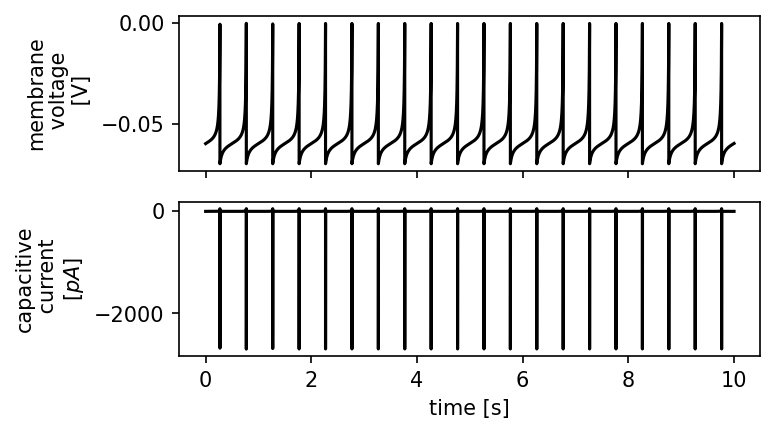

Action potential count: 20


In [25]:
i_in = lambda t: np.ones(np.shape(t))*400.0e-6
v_0 = -0.060
t = np.arange(t_min, 10., h)

v=solve(f_quad, v_0, t)
i_cap = compute_capacitive_current(v,t)


##########################
# display results
fig = plt.figure(dpi=150, figsize=(5,3))

ax1 = fig.add_subplot(211)
ax1.plot(t, v, 'k-')
#ax1.set_xlabel('time [s]')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.set_ylabel('membrane\n voltage\n [V]')

ax2 = fig.add_subplot(212)
ax2.plot(t, i_cap*1.e12, 'k-')
#ax2.plot(t, i_in(t), 'y--', lw=1.)
ax2.set_xlabel('time [s]')
ax2.set_ylabel('capacitive\n current\n[$pA$]')
# cut negative values
ylims = ax2.get_ylim()
#ax2.set_ylim([-0.1*ylims[1], ylims[1]])
#ax2.set_ylim([-0.05, 0.05])

plt.show()

set_parameters()
print("Action potential count:", np.sum(v == v_reset))

0.0
0.0001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007
0.0008
0.0009000000000000001
0.001
0.0011
0.0012000000000000001
0.0013000000000000002
0.0014
0.0015
0.0016
0.0017000000000000001
0.0018000000000000002
0.0019


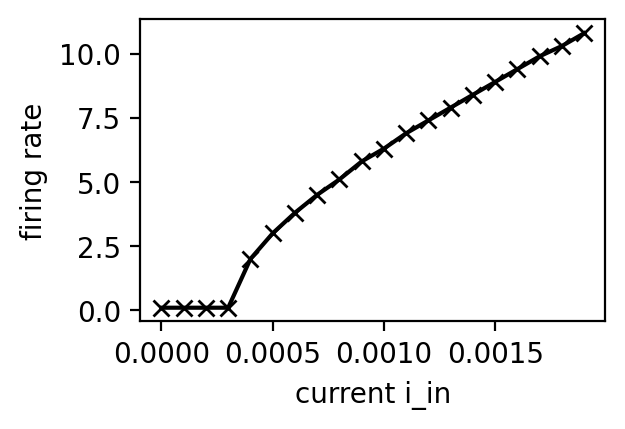

In [23]:

input_current_collection= [0. + i * 100.e-6 for i in range(20)]
n_aps = []  # number of APs 

# total time of simulation
simulation_time = 10. # seconds

# initial condition
v0 = -0.060 
t = np.arange(0,simulation_time,h)


for ampl in input_current_collection:
    
    i_in = lambda t: np.ones(np.shape(t))*ampl
    ################################
    # SOLVE SYSTEM
    # DO NOT CHANGE THIS!
    v=solve(f_quad, v_0, t)
    #################################
    
    n_aps.append(np.sum(v == -0.07))
    print(ampl)

##########################
# display results
fig = plt.figure(dpi=200, figsize=(3,2))

ax1 = fig.add_subplot(111)
ax1.plot(input_current_collection, np.array(n_aps)/10., 'k-')
ax1.plot(input_current_collection, np.array(n_aps)/10., 'kx')
ax1.set_xlabel('current i_in')
ax1.set_ylabel('firing rate')


plt.show()